# Analisando as Notas em geral

In [1]:
#É necessario importar o pandas
import pandas as pd

#read_csv é utilizado para ler arquivos csv
notas = pd.read_csv("ratings.csv")
#Retorna as primeiras colunas
notas.head()


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [2]:
#Nomeia as colunas
notas.columns = ["usuario","ID","Nota","Data"]
notas.head()


,usuario,ID,Nota,Data
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
#Chama uma coluna em especifico
notas["Nota"]

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: Nota, Length: 100836, dtype: float64

In [4]:
#chama uma coluna em especifico
notas.Nota

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: Nota, Length: 100836, dtype: float64

In [5]:
#Seleciona  os valores de forma unica, ou seja, exclui os valores repetidos e os apresenta de forma indidual
notas['Nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [6]:
#Conta quantas vezes um valor especifico aparece em uma coluna
notas['Nota'].value_counts()

Nota
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

In [7]:
#media dos valores de uma coluna especifica
notas.Nota.mean()

3.501556983616962

<Axes: >

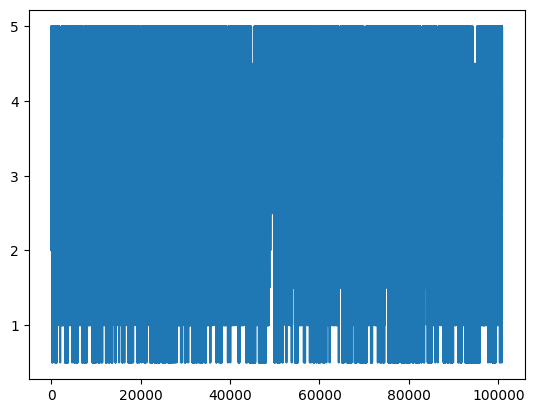

In [8]:
#Cria um grafico "desordenado" e simples da sua tabela
notas.Nota.plot()

<Axes: ylabel='Frequency'>

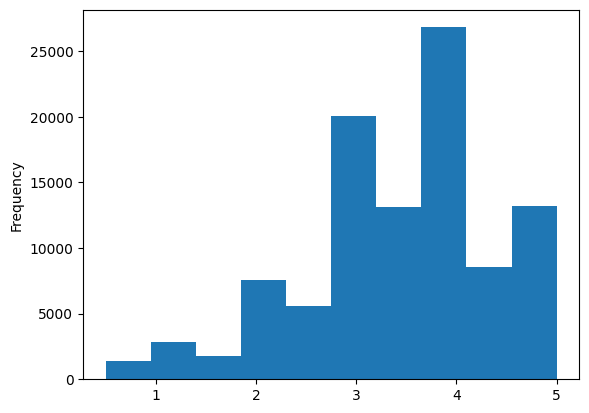

In [9]:
#Apresenta um grafico ordenado "Nesse caso do tipo histograma"
notas.Nota.plot(kind = "hist")

In [10]:
#mediana
notas.Nota.median()

3.5

In [11]:
#Descrição da Coluna
notas.Nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: Nota, dtype: float64

<Axes: ylabel='Nota'>

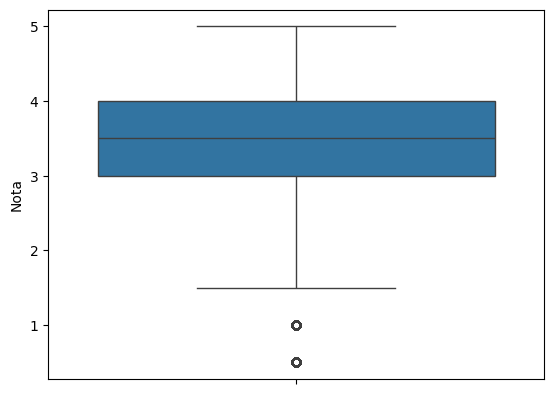

In [12]:
import seaborn as sns

sns.boxplot(notas.Nota)

# Analisando os filmes

In [13]:
filmes = pd.read_csv("movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [14]:
#Apresenta apenas as linhas, onde a coluna "ID" possua um valor igual a "1"
notas.query("ID==1")

,usuario,ID,Nota,Data
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


In [15]:
#Apresenta apenas as linhas onde a coluna "ID" seja igual a "1", apresentando somento os valores de "Nota"
notas.query("ID==1").Nota

0        4.0
516      4.0
874      4.5
1434     2.5
1667     4.5
        ... 
97364    2.5
98479    4.0
98666    2.5
99497    3.0
99534    5.0
Name: Nota, Length: 215, dtype: float64

# Analisando algumas notas por filme

In [16]:
#Apresenta apenas as linhas onde a coluna "ID" seja igual a "1", apresentando somento os valores de "Nota" e agora sua media
notas.query("ID==1").Nota.mean()

3.9209302325581397

In [17]:
#"groupby" serve para agrupar (no caso todos os ID) E pegar a media de todos os valores relacionados ao ID
notas.groupby("ID").mean()

,usuario,Nota,Data
ID,,,
1,306.530233,3.920930,1.129835e+09
2,329.554545,3.431818,1.135805e+09
3,283.596154,3.259615,1.005110e+09
4,219.857143,2.357143,8.985789e+08
5,299.571429,3.071429,9.926643e+08
...,...,...,...
193581,184.000000,4.000000,1.537109e+09
193583,184.000000,3.500000,1.537110e+09
193585,184.000000,3.500000,1.537110e+09


In [18]:
#"groupby" serve para agrupar (no caso todos os ID) E pegar a media de todos os valores relacionados ao ID
#Agora estamos selecionando apenas uma coluna em especifico "Sendo o ID o indice "
medias_por_filme = notas.groupby("ID").mean().Nota
medias_por_filme.head()


ID
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: Nota, dtype: float64

<Axes: ylabel='Frequency'>

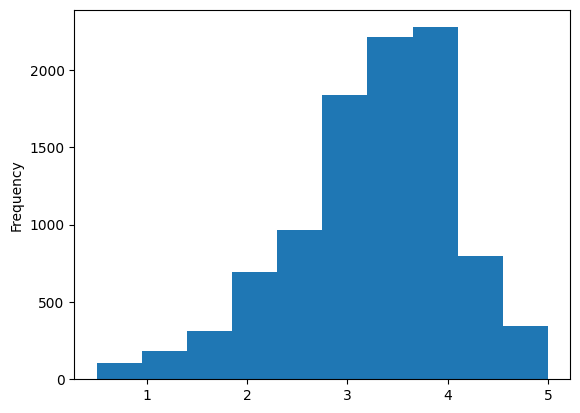

In [19]:
medias_por_filme.plot(kind = "hist")

<Axes: xlabel='Nota'>

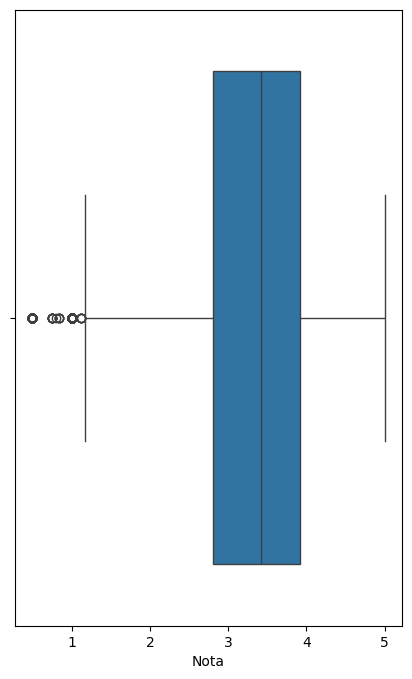

In [20]:
import matplotlib.pyplot as plt

#modifica o tamanho dos graficos
plt.figure(figsize=(5,8))
sns.boxplot(x = medias_por_filme)

In [21]:
#descreve os valores da query
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: Nota, dtype: float64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3216\3911402991.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(medias_por_filme)


<Axes: xlabel='Nota', ylabel='Density'>

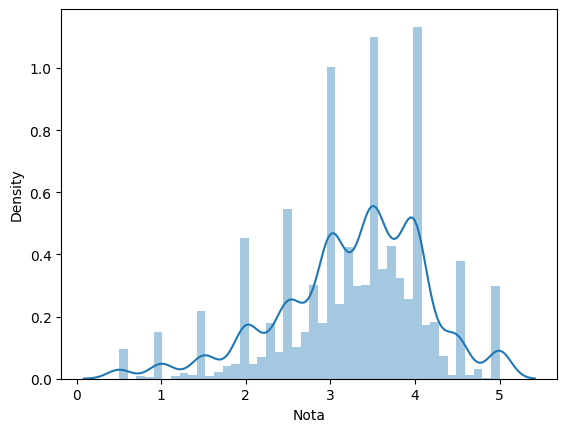

In [22]:
#histograma do seaborn
sns.distplot(medias_por_filme)

Text(0.5, 1.0, 'Histograma das médias dos filmes')

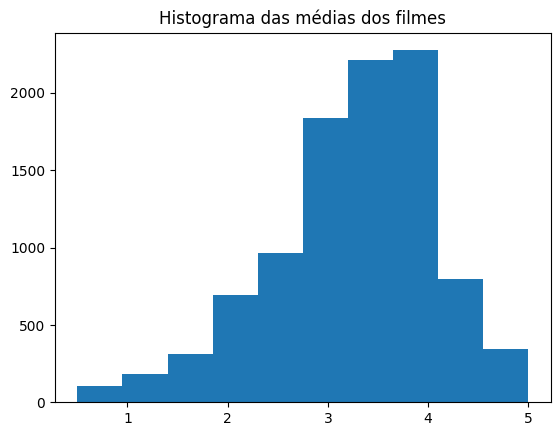

In [23]:
plt.hist(medias_por_filme)
plt.title("Histograma das médias dos filmes")

In [24]:
tmdb = pd.read_csv("tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [25]:
#categoria nominal
#É aquela que classifica os dados em categorias distintas, nas quais não está implícito nenhum tipo de ordenação.

In [26]:
#categoria ordinal
#É aquela que classifica os dados em categorias distintas, nas quais está implícito um tipo de ordenamento

# Diferença das linguas por filme

In [27]:
#O valor gerado se chama "serie"
tmdb["original_language"].value_counts()

original_language
en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: count, dtype: int64

In [28]:
#transformando a "serie" em "dataframe"
tmdb["original_language"].value_counts().to_frame()

,count
original_language,
en,4505
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
cn,12


In [29]:
#transformando "series" em "dataframes" e removendo os indices
tmdb["original_language"].value_counts().to_frame().reset_index()

,original_language,count
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27
5,hi,19
6,ja,16
7,it,14
8,cn,12
9,ru,11


In [30]:
contagem_de_lingua = tmdb["original_language"].value_counts().to_frame().reset_index()
#mudando o nome do index
contagem_de_lingua.columns = ["original_language", "total"]
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


<Axes: xlabel='original_language', ylabel='total'>

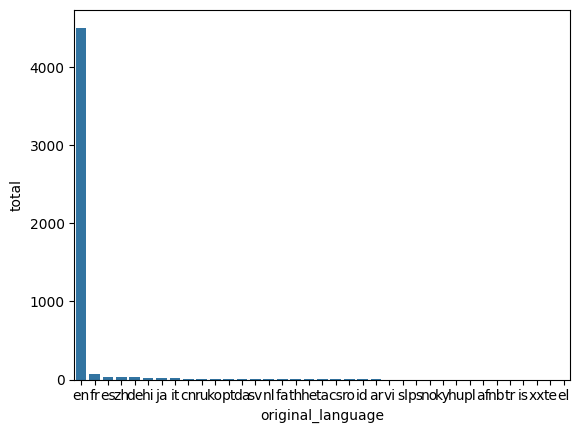

In [31]:
#barplot = grafico de categoria
#só conseguimos utilizar o "total" por que o nomeamos anteriormente (dividindo o index e o renomeando "nesse caso")
sns.barplot(x="original_language", y = "total", data = contagem_de_lingua)

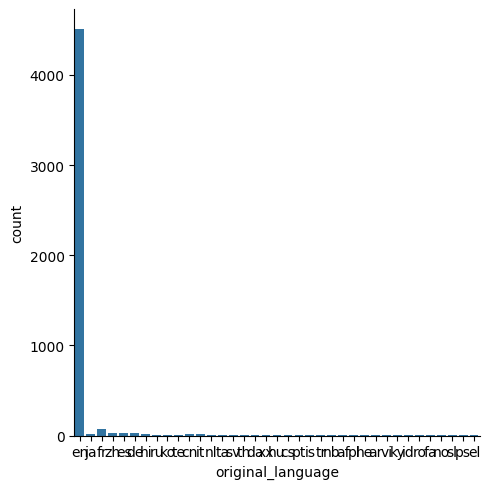

In [32]:
#Faz tudo o que foi feito anteriormente, de forma resumida
sns.catplot(x = "original_language", kind="count", data = tmdb)

([<matplotlib.patches.Wedge at 0x20149c543e0>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text(

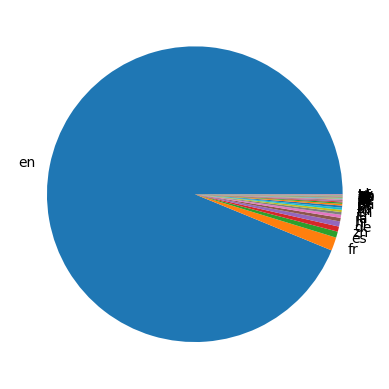

In [33]:
#Cria o grafico de torta - pizza - Porém de uma maneira feia e totalmente desorganizada
plt.pie(contagem_de_lingua['total'], labels = contagem_de_lingua["original_language"])

In [34]:
#Calculo simples da quantidade de lingua falada


#Calculando o valor de cada lingua separado
total_por_lingua = tmdb["original_language"].value_counts()
#Somando os valores de todas as linguas
total_geral = total_por_lingua.sum()
#Pegando o valor da soma de "ingles" e guardando em uma variavel
total_de_ingles = total_por_lingua.loc["en"]
#Calculo simples de subtração para se pegar o resto (no caso o resto para )
total_do_resto = total_geral - total_de_ingles
#Apresentando as variaveis calculadas
print(total_de_ingles, total_do_resto)




4505 298


Text(0.5, 1.0, 'Total de filmes feitos a partir da lingua inglesa')

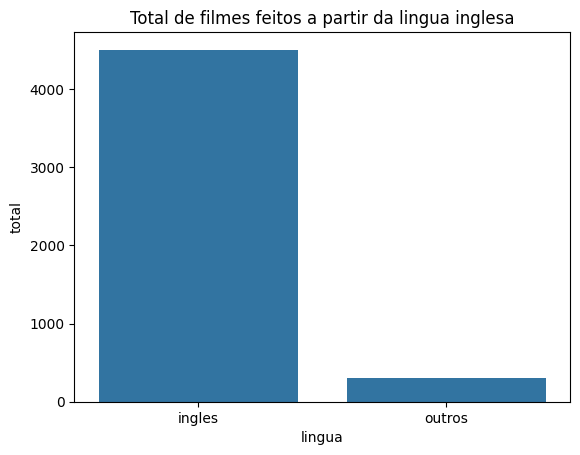

In [35]:
#Criar um dicionario é um das maneiras de se apresentar graficos da melhor forma, onde o valor que da nome ao dicionario
#É uma "coluna" e o valores que vem posteriormente são as "Linhas"
dados = {
    'lingua' : ['ingles', 'outros'],
    'total' : [total_de_ingles, total_do_resto]
}
#Sobrescever a variavel para facilitar encontrar ela depois
dados = pd.DataFrame(dados)
#Criando o gráfico de barras, para apresentar essa historia em forma grafica
sns.barplot(x = "lingua", y= "total", data = dados)
#Criando um titulo para o gráfico
plt.title("Total de filmes feitos a partir da lingua inglesa")

([<matplotlib.patches.Wedge at 0x20149ed5340>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

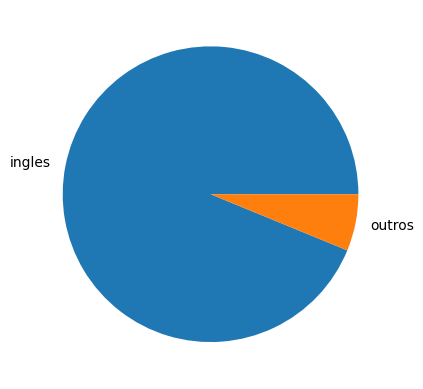

In [36]:
#Labels = para os nomes do grafico de torta
#O valor solto para os numeros
plt.pie(dados["total"], labels = dados["lingua"])





In [37]:
#Só vai apresentar as linhas em que a lingua original "original_languague" for diferente de ingles "en"
#logo deppis chama original_linguage novamente e soma os valores (diferentes de ingles)
total_por_lingua_de_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts()
total_por_lingua_de_outros_filmes

original_language
fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
ro     2
id     2
ar     2
cs     2
ta     2
tr     1
nb     1
af     1
pl     1
is     1
hu     1
vi     1
ky     1
xx     1
te     1
no     1
sl     1
ps     1
el     1
Name: count, dtype: int64

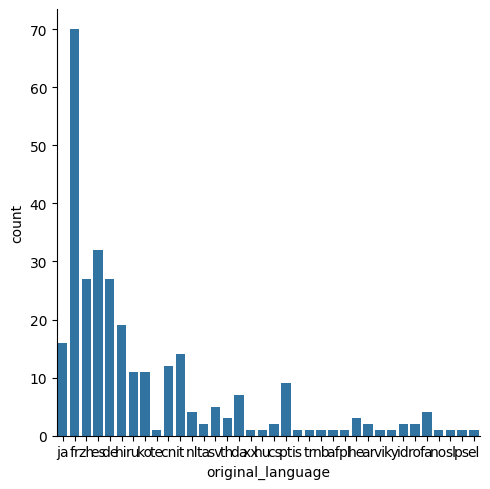

In [38]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")
#conta as linguas lingua só que sem o ingles
sns.catplot(x = "original_language", kind="count", data = filmes_sem_lingua_original_em_ingles)

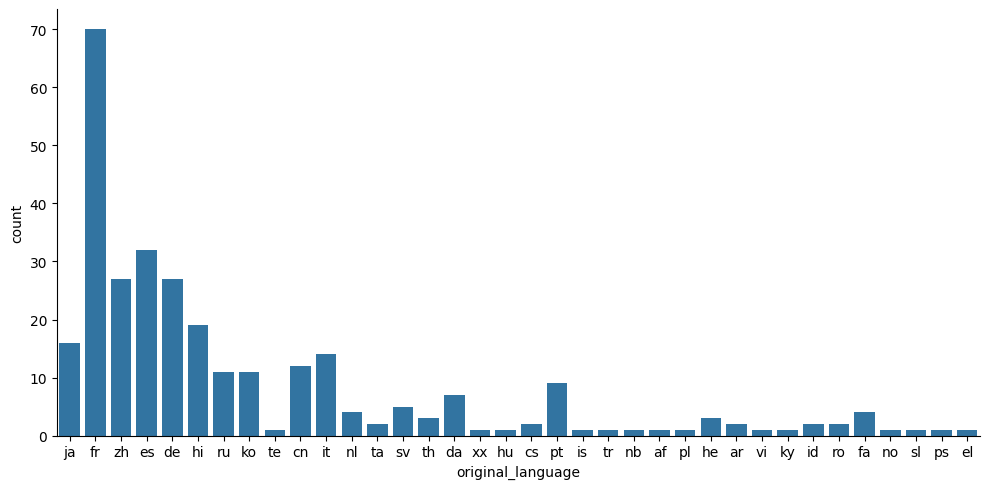

In [39]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")
#Esse "aspect" no final serve para aumentar o tamanho das colunas.
sns.catplot(x = "original_language", kind="count", data = filmes_sem_lingua_original_em_ingles, aspect = 2)

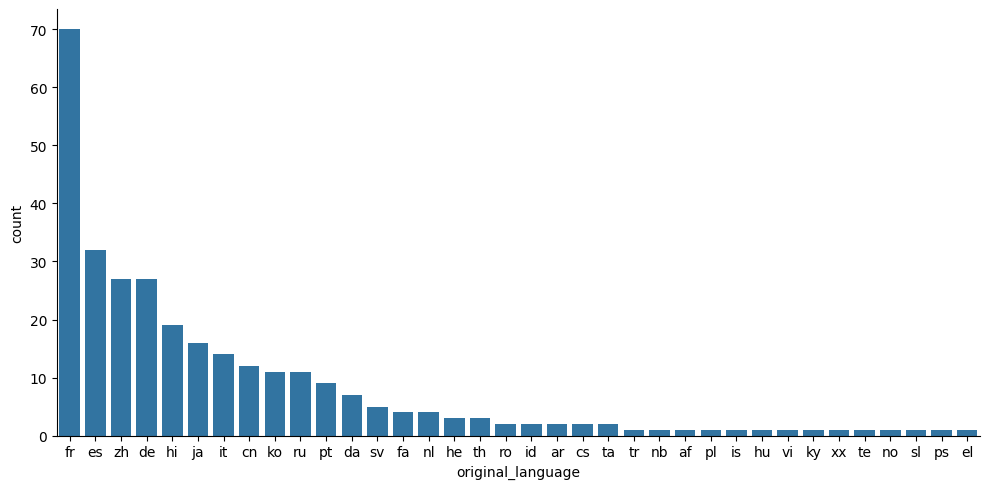

In [40]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")
#Esse "aspect" no final serve para aumentar o tamanho das colunas e agora utilizou o index ja trabalho anteriormente;
#para classificar em ordem descrecente as colunas
sns.catplot(x = "original_language", kind="count", data = filmes_sem_lingua_original_em_ingles, aspect = 2, order = total_por_lingua_de_outros_filmes.index)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3216\2821611713.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x = "original_language", kind="count", data = filmes_sem_lingua_original_em_ingles, aspect = 2, order = total_por_lingua_de_outros_filmes.index,


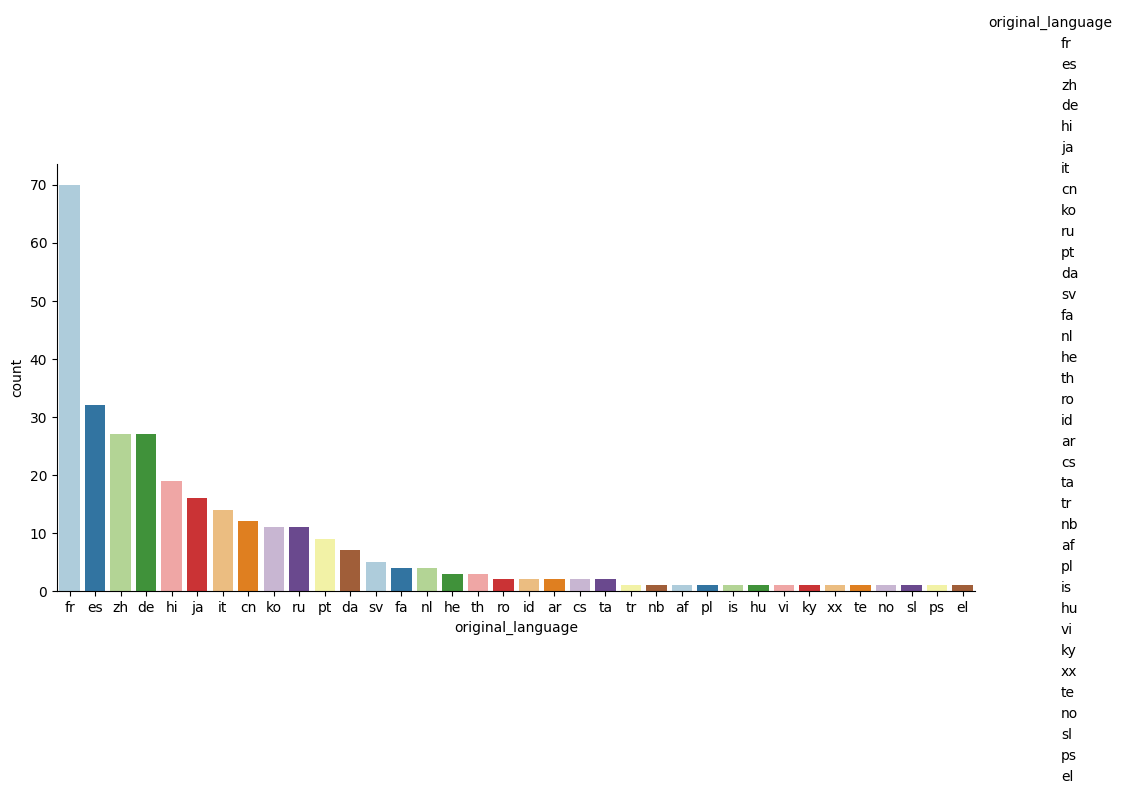

In [41]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")
#Esse "aspect" no final serve para aumentar o tamanho das colunas e agora utilizou o index ja trabalho anteriormente;
#para classificar em ordem descrecente as colunas
#pallete muda a cor do grafico
sns.catplot(x = "original_language", kind="count", data = filmes_sem_lingua_original_em_ingles, aspect = 2, order = total_por_lingua_de_outros_filmes.index,
            palette=("Paired") )

In [42]:
notas.columns = ["usuarioId","filmeId","nota","momento"]
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [43]:
#pegando 1 filme especifico
notas_do_toy_story = notas.query("filmeId == 1")
notas_do_jumanji = notas.query("filmeId == 2")
print(len(notas_do_toy_story), len(notas_do_jumanji))

215 110


# Calculos de média e mediana


In [44]:
#printando a media
"""A media em si não é o melhor parametro para comparação, pois deixa muitas variaveis de decisões importantes para fora
focando mais no comportamento central"""

print("Nota média do Toy Story %.2f"% notas_do_toy_story.nota.mean())
print("Nota média do Jumanji %.2f"% notas_do_jumanji.nota.mean())

Nota média do Toy Story 3.92
Nota média do Jumanji 3.43


In [45]:
import numpy as np

filme1 = np.append(np.array([2.5] * 10), np.array([3.5] * 10))
filme2 = np.append(np.array([5] * 10), np.array([1] * 10))


In [46]:
#Para se tirar a mediana de (np.arrays) é necessário utilizar "np.median"
print(filme1.mean(), filme2.mean())
print(np.median(filme1), np.median(filme2))

3.0 3.0
3.0 3.0


<Axes: xlabel='filmeId', ylabel='nota'>

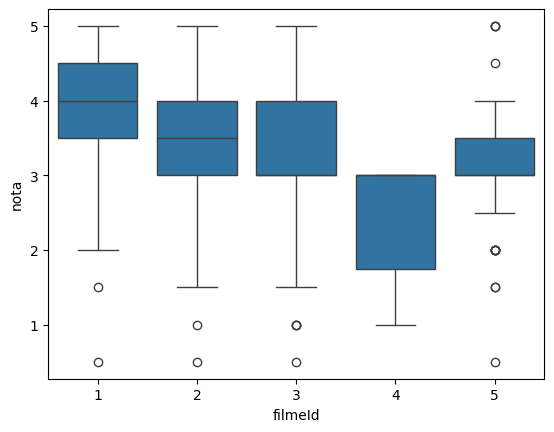

In [47]:
#faz um grafico boxplot, pegando apenas os valores que você deseja
sns.boxplot(x = "filmeId", y = "nota", data = notas.query("filmeId in [1,2,3,4,5]"))

In [48]:
#calculo de desvio padrão
print(notas_do_toy_story.nota.std(), notas_do_jumanji.nota.std())

0.8348591407114047 0.8817134921476455
